In [1]:
from simulator import HathorSimulator, Miner, TxGenerator
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
simulators = []

In [3]:
for tx_lambda in [1/8., 1/16., 1/32., 1/64.]:
    print(tx_lambda)
    
    sim = HathorSimulator(block_weight=20.30)

    m0 = Miner(hashpower=10000)
    sim.add_miner(m0)

    g1 = TxGenerator(tx_lambda=tx_lambda, hashpower=10000)
    sim.add_tx_generator(g1)
    
    sim.run(3600*24*3)
    
    simulators.append(sim)

0.125
[        0.00] min weight updated: w_blk=22.8850 w_tx=  -inf
[     3601.51] min weight updated: w_blk=22.8850 w_tx=13.9800
[     7225.37] min weight updated: w_blk=22.8850 w_tx=14.1280
[    10839.29] min weight updated: w_blk=22.8850 w_tx=14.0104
[    14442.01] min weight updated: w_blk=22.8850 w_tx=14.0616
[    18042.57] min weight updated: w_blk=22.8850 w_tx=14.0409
[    21646.24] min weight updated: w_blk=22.8850 w_tx=13.9093
[    25250.13] min weight updated: w_blk=22.8850 w_tx=14.0458
[    28863.77] min weight updated: w_blk=22.8850 w_tx=13.9222
[    32464.16] min weight updated: w_blk=22.8850 w_tx=14.1198
[    36069.20] min weight updated: w_blk=22.8850 w_tx=14.0453
[    39669.32] min weight updated: w_blk=22.8850 w_tx=13.9675
[    43278.73] min weight updated: w_blk=22.8850 w_tx=14.1250
[    46879.95] min weight updated: w_blk=22.8850 w_tx=13.9866
[    50487.51] min weight updated: w_blk=22.8850 w_tx=13.9314
[    54092.16] min weight updated: w_blk=22.8850 w_tx=14.0236
[  

[   255226.64] min weight updated: w_blk=22.9008 w_tx=13.1946
[   256853.46] min weight updated: w_blk=22.9008 w_tx=13.1151
0.03125
[        0.00] min weight updated: w_blk=22.8850 w_tx=  -inf
[     3677.99] min weight updated: w_blk=22.8850 w_tx=11.8135
[     7409.12] min weight updated: w_blk=22.8850 w_tx=11.8625
[    11015.79] min weight updated: w_blk=22.8850 w_tx=11.8978
[    14700.44] min weight updated: w_blk=22.8850 w_tx=11.6605
[    18308.70] min weight updated: w_blk=22.8850 w_tx=11.9643
[    21934.02] min weight updated: w_blk=22.8850 w_tx=12.0950
[    25535.39] min weight updated: w_blk=22.8850 w_tx=12.1399
[    29175.75] min weight updated: w_blk=22.8850 w_tx=12.0528
[    32778.23] min weight updated: w_blk=22.8850 w_tx=12.0432
[    36568.10] min weight updated: w_blk=22.8850 w_tx=12.0428
[    40188.09] min weight updated: w_blk=22.8850 w_tx=12.0237
[    43835.43] min weight updated: w_blk=22.8850 w_tx=12.3373
[    47440.03] min weight updated: w_blk=22.8850 w_tx=12.0299
[

(0, 1700)

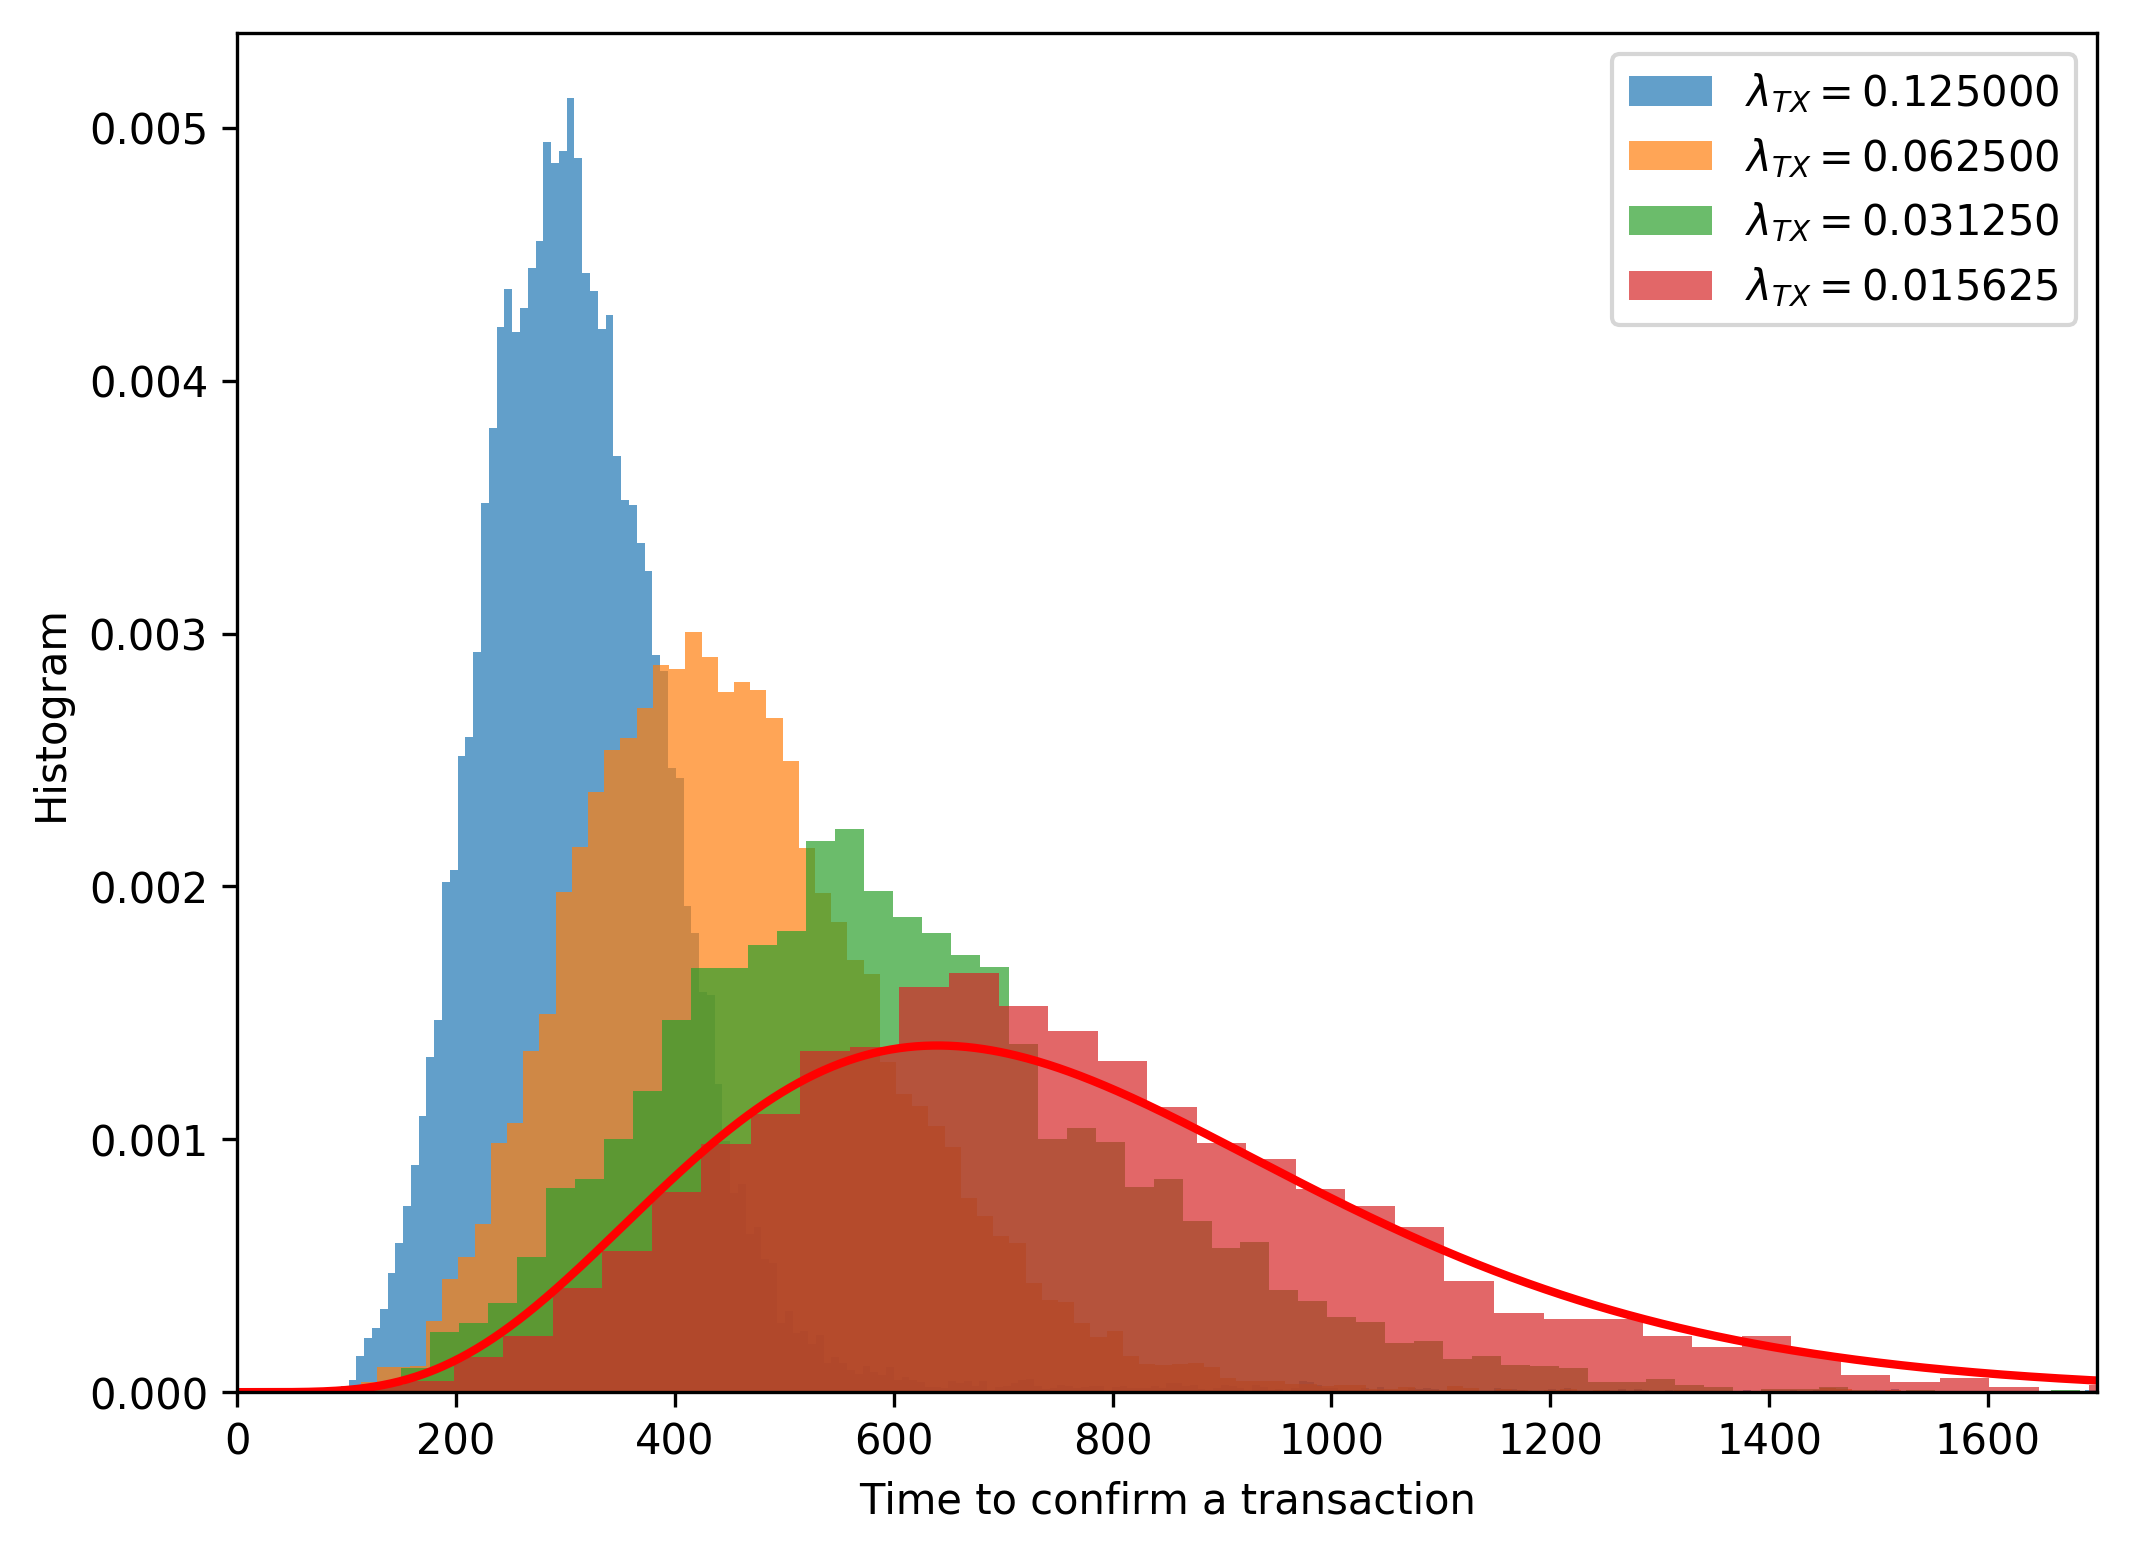

In [4]:
plt.figure(figsize=(8, 6), dpi=300)
for sim in simulators:
    nodes = sim.transactions + sim.blocks
    nodes.sort(key=lambda x: x.time)
    v = [tx.extras['confirmed_time'] - tx.time for tx in nodes if tx.type == 'tx' and 'confirmed_time' in tx.extras]
    plt.hist(v, bins='fd', density=True, alpha=0.7, label='$\lambda_{{TX}} = {:.6f}$'.format(sim.tx_generators[0].tx_lambda));

x = np.linspace(0, max(v), 1000)
y = scipy.stats.erlang.pdf(x, 6, 0, 128)
plt.plot(x, y, 'r', linewidth=2);

plt.ylabel('Histogram')
plt.xlabel('Time to confirm a transaction');
plt.legend();

plt.xlim(0, 1700)

In [5]:
print(sim.block_weight, sim.min_weight_confirmed)
for tx in nodes:
    if 'confirmed_time' in tx.extras:
        dt = tx.extras['confirmed_time'] - tx.time
        if dt > 1000:
            print(tx.name, tx.type, tx.weight, tx.acc_weight, dt)

(20.3, 22.88538603131802)
('28', 'blk', 20.3, 23.10735492205761, 1468.0903999999998)
('29', 'blk', 20.3, 23.10735492205761, 1600.5767999999998)
('30', 'tx', 17, 22.88864040685735, 1402.1307974738904)
('31', 'tx', 17, 22.88864040685735, 1472.790939515484)
('32', 'blk', 20.3, 23.10735492205761, 1567.6264)
('33', 'tx', 17, 22.892308960633294, 1450.8359162109734)
('34', 'tx', 17, 23.092667860886383, 1446.897970636939)
('35', 'tx', 17, 23.071371754897335, 1393.0847929001268)
('36', 'tx', 17, 22.88864040685735, 1269.1603688431826)
('37', 'tx', 17, 22.90917141998669, 1264.2460329130581)
('38', 'blk', 20.3, 23.10735492205761, 1310.6913000000002)
('39', 'blk', 20.3, 23.10735492205761, 1378.4714000000001)
('40', 'tx', 17, 23.071371754897335, 1197.6253345238545)
('41', 'tx', 17, 23.049756574084892, 1140.1604449724962)
('42', 'tx', 17, 23.027812611574443, 1032.9411102378508)
('44', 'blk', 20.3, 23.10735492205761, 1046.5885000000003)
('75', 'blk', 20.3, 23.10735492205761, 1252.7012)
('76', 'tx', 17

In [ ]:
for tx in sim.blocks:
    print(tx.name, tx.weight, tx.acc_weight)

In [ ]:
dot = sim.gen_dot()
#dot.attr(rankdir='RL')
dot.attr(rankdir='BT')
dot.attr(size='200, 30')

#print(dot.render())
print(dot.source)